In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel(r"C:\Users\ACER\Downloads\iris.xls")

In [7]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64


In [9]:
df.dropna(inplace=True)

In [11]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 3


In [13]:
df.drop_duplicates(inplace=True)

In [15]:
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object


In [17]:
print("\nData after pre-processing:")
print(df.head())


Data after pre-processing:
    SL   SW   PL   PW Classification
0  5.1  3.5  1.4  0.2    Iris-setosa
1  4.9  3.0  1.4  0.2    Iris-setosa
3  4.6  3.1  1.5  0.2    Iris-setosa
4  5.0  3.6  1.4  0.2    Iris-setosa
5  5.4  3.9  1.7  0.4    Iris-setosa


In [21]:
X = df.drop(columns=['Classification'])
y = df['Classification']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM (Support Vector Machine)': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [29]:
results = {}

In [31]:
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)

In [33]:
 y_pred = model.predict(X_test_scaled)

In [35]:
accuracy = accuracy_score(y_test, y_pred)

In [37]:
results[model_name] = accuracy

In [39]:
print(f"\n{model_name} Classification Report:")
print(classification_report(y_test, y_pred))


K-Nearest Neighbors Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        26
      macro avg       1.00      1.00      1.00        26
   weighted avg       1.00      1.00      1.00        26



In [53]:
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)

<Figure size 600x400 with 0 Axes>

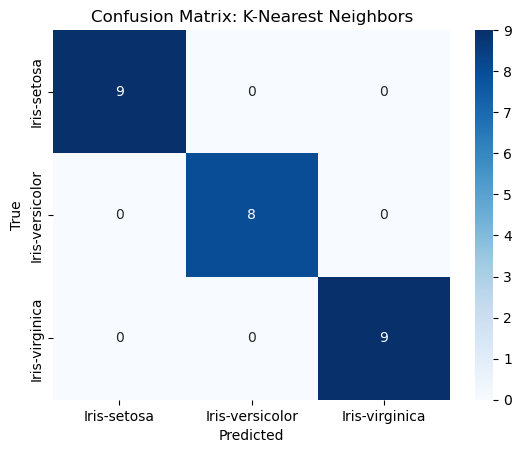

In [61]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title(f"Confusion Matrix: {model_name}")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [63]:
print("\nAccuracy of different models:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")


Accuracy of different models:
K-Nearest Neighbors: 1.0000


In [65]:
best_model_name = max(results, key=results.get)
best_model_accuracy = results[best_model_name]
print(f"\nThe best model is {best_model_name} with an accuracy of {best_model_accuracy:.4f}")


The best model is K-Nearest Neighbors with an accuracy of 1.0000
